In [2]:
pip install quandl

In [59]:
import quandl
import pandas as pd
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
#Before we were regressing on 1% of our total data now lets forecast in the future for the 1% amount of data on the same dataset.
df = quandl.get("WIKI/GOOGL")#Getting our data from quandl
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [61]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]#Taking only the data from dataframe that is useful for our operation. 
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 #Adding an High - Low Percent to get volatility of our stock data.
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 #Adding the percent change coloumn as well.
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]#Filtering our data to get rid of the redundant parts.

In [34]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [62]:
forecast_col = 'Adj. Close' #since working on stock prices using adj close 
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [63]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [37]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [38]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.150000,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.550000,4.089299,-2.360729,2413517.0,NaN


In [40]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,1.142604,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,1.213207,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,1.547000,0.476195,2774967.0,1026.550000


In [64]:
#Initialising X and y with our feeatures and labels respectively.
X = np.array(df.drop(['label'],1))


In [65]:
X = preprocessing.scale(X)#Pre processing our data

In [66]:
X_later = X[-forecast_out:] # Taking forecast_out units of data from the last index.
X = X[:-forecast_out:]
df.dropna(inplace=True)

In [67]:
y = np.array(df['label'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Splitting our data into training and testing data 0.2 is specified means 80% is our training data and the rest is testing

In [69]:
clf = LinearRegression()

In [70]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
confidence = clf.score(X_test,y_test)

In [72]:
confidence # with support vector regression we get an accuracy of ~80% which is okay lets try another clawssifier

0.9788400921663122

In [27]:
#The thing is in SVR there is no threading there so it is less efficient compared to the linear regression algo used above.

In [73]:
forecast_set = clf.predict(X_later)

In [74]:
forecast_set

array([1100.13479472, 1074.5543837 , 1020.5048879 , 1058.68151628,
       1074.95855341, 1075.5265556 , 1092.77299661, 1111.64863599,
       1117.06454884, 1124.18896521, 1134.16493791, 1131.42797483,
       1149.79468703, 1166.20507981, 1138.20610186, 1124.63581188,
       1089.31508687, 1102.85798052, 1114.92873933, 1123.3989397 ,
       1135.76736017, 1151.76223381, 1182.05165991, 1188.16053428,
       1159.13095976, 1171.07971847, 1171.85880675, 1155.42671472,
       1119.86300312, 1116.43146112, 1114.98221267, 1071.73605497,
       1044.0208201 , 1070.6559132 , 1020.80798638])

In [75]:
#Here we can see the prediction or say the forecast now lets try to visualise this forecast for abetter experience and understanding.

In [76]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [77]:
style.use('ggplot')

In [78]:
df['Forecast'] = np.nan

In [79]:
last_date = df.iloc[-1].name # Extracting the last date from our data set
last_unique = last_date.timestamp()

In [80]:
one_day = 86400 #seconds

In [81]:
next_unique = last_unique + one_day

In [82]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unique += 86400
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

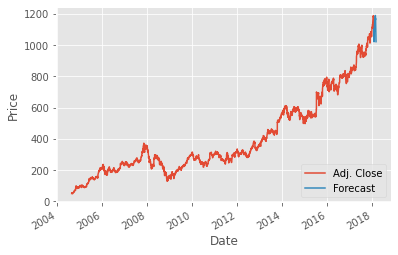

In [83]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()